In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("wingman_viz.csv")
pd.set_option('display.max_columns', None)

data.set_index('id', inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.head(5)

,far_part,flt_plan_filed,acft_make,acft_model,total_seats,num_eng,fixed_retractable,cert_max_gr_wt,acft_category,homebuilt,type_last_insp,afm_hrs_last_insp,afm_hrs,certs_held,type_fly,second_pilot,dprt_apt_id,dprt_time,dest_apt_id,site_seeing,air_medical,flight_hours_mean,crew_category,crew_sex,pc_profession,crew_tox_perf,mr_faa_med_certf,available_restraint,eng_no,eng_type,eng_mfgr,power_units,hp_or_lbs,carb_fuel_injection,subcategory_no,ev_date,ev_dow,ev_time,ev_country,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,apt_name,apt_dist,apt_dir,apt_elev,wx_obs_time,wx_obs_dir,wx_obs_elev,wx_obs_dist,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,wx_cond_basic
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20080115X000511,091,NONE,Cessna,152,2.0,1.0,FIXD,1670.0,AIR,N,ANNL,NaN,5835.299805,Y,INST,N,KFNL,2215.0,KFNL,N,N,18.0,DSTU,M,No,N,NaN,NaN,1,REC,Lycoming,110.0,HP,CARB,6,2008-01-02,We,2230.0,USA,2008,1,NaN,NaN,040276N,0010504W,Fort Collins Loveland,1.0,NaN,5016.0,2235.0,180.0,NaN,1.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,10.0,19.0,7.0,150.0,U,5.0,F,T,0.0,30.260000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,1,0,1.0,VMC
20080116X000631,135,CVFR,PIPER,PA-31-350,10.0,2.0,RETR,7368.0,AIR,N,100H,27.0,13130.000000,Y,NaN,N,ADQ,1743.0,HOM,N,N,9437.0,PLT,M,Yes,Y,NaN,NaN,1,REC,Lycoming,350.0,HP,FINJ,3,2008-01-05,Sa,1743.0,USA,2008,1,NaN,NaN,057452N,0152287W,Kodiak,0.0,NaN,78.0,1753.0,0.0,78.0,0.0,DAYL,FEW,1600.0,0.0,NaN,NaN,NaN,10.0,25.0,14.0,300.0,U,17.0,F,F,26.0,28.959999,NaN,NaN,FATL,NaN,NaN,NaN,6,1,0,3,10.0,VMC
20080122X000871,091,CVFR,BELL,407,7.0,1.0,FIXD,5000.0,HELI,N,NaN,NaN,3895.000000,Y,POSI,N,DED,2331.0,NONE,N,N,3120.0,PLT,M,Yes,N,NaN,NaN,1,TS,Rolls Royce,674.0,HP,NaN,5,2008-01-07,Mo,2345.0,USA,2008,1,NaN,NaN,028594N,0811758W,NaN,0.0,NaN,NaN,2353.0,230.0,34.0,15.0,DAYL,FEW,2000.0,7000.0,BKN,NaN,NaN,10.0,66.0,61.0,70.0,U,4.0,F,T,0.0,30.299999,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC
20080220X002121,091,NONE,Bellanca,7GCBC,2.0,1.0,FIXD,1650.0,AIR,N,ANNL,7.0,1100.000000,Y,PERS,NaN,NaN,NaN,NaN,N,N,4600.0,PLT,M,UNK,N,NaN,NaN,1,REC,Lycoming,150.0,HP,CARB,6,2008-01-07,Mo,1915.0,USA,2008,1,NaN,NaN,361419N,0119835W,THUNDERHAWK FIELD,0.0,NaN,340.0,1915.0,90.0,NaN,13.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,10.0,52.0,43.0,340.0,U,8.0,F,T,0.0,30.090000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC
20080207X001531,091,NONE,Bell,206 B2,5.0,1.0,FIXD,NaN,HELI,N,ANNL,NaN,NaN,Y,PERS,N,POC,NaN,POC,N,N,6500.0,PLT,M,NaN,N,NaN,NaN,1,TS,Rolls-Royce,400.0,HP,NaN,4,2008-01-13,Su,15.0,USA,2008,1,NaN,NaN,035529N,1174654W,BRACKETT FIELD,0.0,NaN,NaN,NaN,0.0,NaN,0.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,30.0,72.0,0.0,0.0,Y,NaN,T,T,0.0,0.000000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC


In [118]:
subcat_legend = {
    1: "Handling",
    2: "Systems",
    3: "Structural",
    4: "Propeller",
    5: "Power Plant",
    6: "Oper/Perf/Capability",
    7: "Fluids / Misc Hardware"
}

subcat_labels = [val for key, val in subcat_legend.items()]

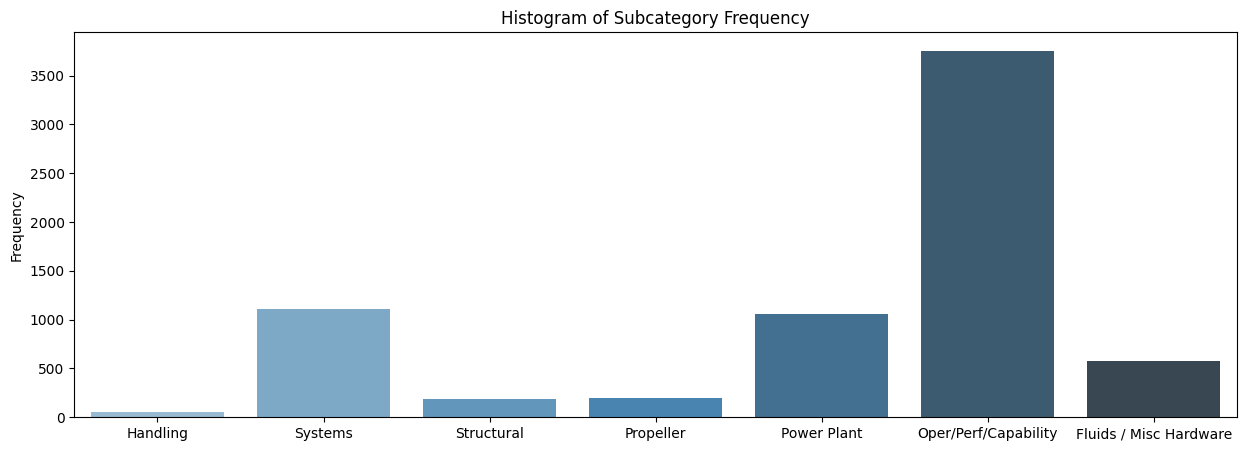

In [119]:
subcat_counts = data['subcategory_no'].value_counts()
sorted_subcats = subcat_counts.index.sort_values()

plt.figure(figsize=(15, 5))

ax = sns.barplot(x=sorted_subcats, y=subcat_counts[sorted_subcats], palette="Blues_d")

plt.title('Histogram of Subcategory Frequency')
plt.xlabel('')
plt.ylabel('Frequency')

ax.set_xticklabels(subcat_labels)
plt.xticks(rotation=0)

plt.show();

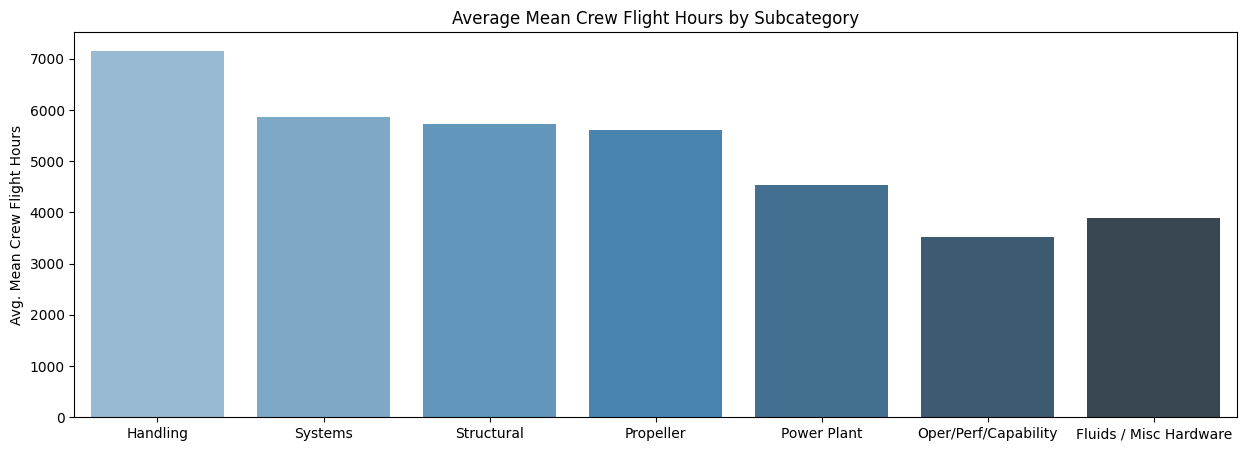

In [120]:
mean_flight_hours_cat = data.groupby('subcategory_no')['flight_hours_mean'].mean().reset_index()

plt.figure(figsize=(15, 5))

ax = sns.barplot(x='subcategory_no', y='flight_hours_mean', data=mean_flight_hours_cat, palette="Blues_d")

plt.title('Average Mean Crew Flight Hours by Subcategory')
plt.xlabel('')
plt.ylabel('Avg. Mean Crew Flight Hours')

ax.set_xticklabels(subcat_labels)
plt.xticks(rotation=0)

plt.show();

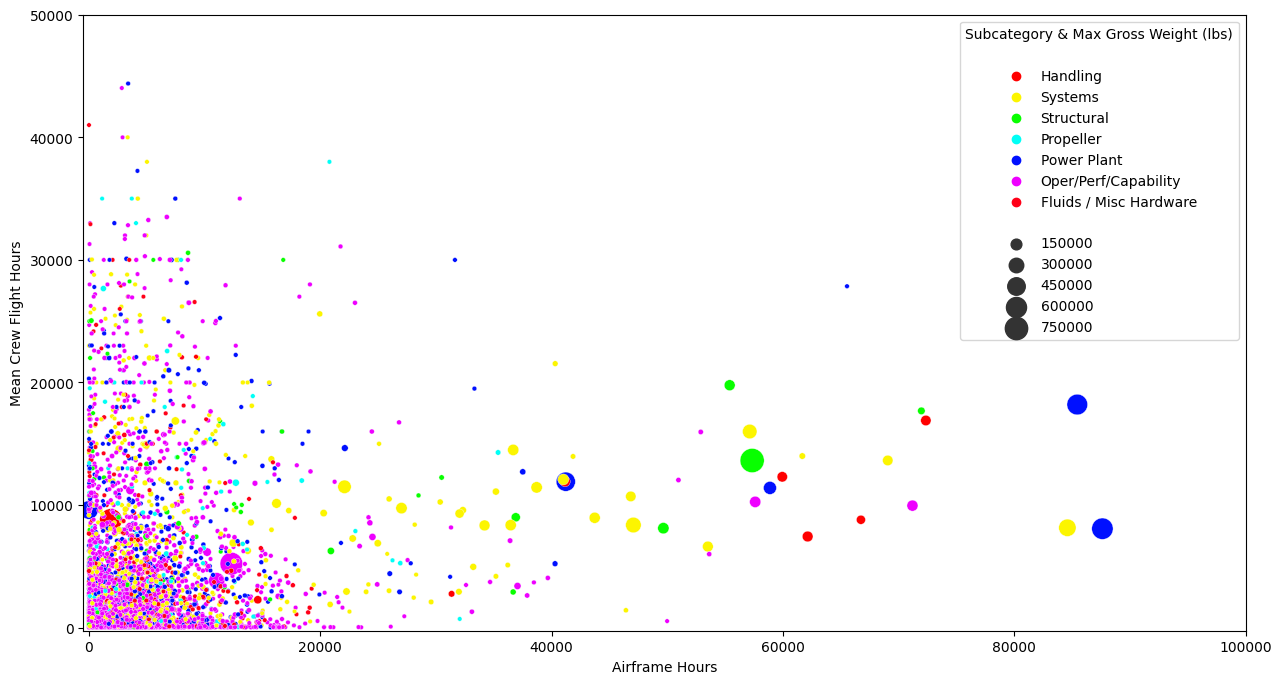

In [121]:
plt.figure(figsize=(15, 8))

ax = sns.scatterplot(x="afm_hrs", y="flight_hours_mean", hue='subcategory_no', size="cert_max_gr_wt", sizes=(10, 300), palette='hsv', data=data)

plt.xlabel('Airframe Hours')
plt.ylabel('Mean Crew Flight Hours')

legend = ax.legend()
legend.set_title('Subcategory & Max Gross Weight (lbs)')

legend_texts = legend.get_texts()
legend_texts[0].set_text('')
for i in range(1, 8):
    legend_texts[i].set_text(subcat_labels[i-1])
legend_texts[8].set_text('')

plt.xlim(-500, 100_000)
plt.ylim(-250, 50_000)

ax.grid(False)

plt.show();

In [122]:
df = data.dropna(subset=['longitude', 'latitude'])

In [123]:
def convert_longitude(value):
    
    direction = value[-1]
    
    degrees = value[:3]
    minutes = value[3:5]
    decimal = value[5:-1]
    
    sign = -1 if direction in ['S', 'W'] else 1
    
    abs_value = f"{degrees}.{minutes}{decimal}"
    
    return sign * float(abs_value)

def convert_latitude(value):
    
    direction = value[-1]
    
    degrees = value[:2]
    minutes = value[2:4]
    decimal = value[4:-1]
    
    sign = -1 if direction in ['S', 'W'] else 1
    
    abs_value = f"{degrees}.{minutes}{decimal}"
    
    return sign * float(abs_value)

In [125]:
df.drop(columns=['lat', 'long'], inplace=True)

KeyError: "['lat', 'long'] not found in axis"

In [129]:
df['lat'] = df['latitude'].astype(str)
df['long'] = df['longitude'].astype(str)

df['lat'] = df['lat'].apply(convert_latitude)
df['long'] = df['long'].apply(convert_longitude)

/tmp/ipykernel_1486/3995449922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = df['latitude'].astype(str)
/tmp/ipykernel_1486/3995449922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long'] = df['longitude'].astype(str)
/tmp/ipykernel_1486/3995449922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

id
20080115X000511     4.0276
20080116X000631     5.7452
20080122X000871     2.8594
20080220X002121    36.1419
20080207X001531     3.5529
                    ...   
20200905X422251    43.2459
20200909X145321    26.3512
20200914X023201     0.4580
20200920X321511    32.3326
20200922X851311     3.8150
Name: lat, Length: 6930, dtype: float64

In [133]:
import folium

# Create a folium map centered around the first location
map = folium.Map(location=[df['lat'].iloc[0], df['long'].iloc[0]], zoom_start=5)

# Add markers for each location
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(map)

# Display the map
map

In [134]:
data

,far_part,flt_plan_filed,acft_make,acft_model,total_seats,num_eng,fixed_retractable,cert_max_gr_wt,acft_category,homebuilt,type_last_insp,afm_hrs_last_insp,afm_hrs,certs_held,type_fly,second_pilot,dprt_apt_id,dprt_time,dest_apt_id,site_seeing,air_medical,flight_hours_mean,crew_category,crew_sex,pc_profession,crew_tox_perf,mr_faa_med_certf,available_restraint,eng_no,eng_type,eng_mfgr,power_units,hp_or_lbs,carb_fuel_injection,subcategory_no,ev_date,ev_dow,ev_time,ev_country,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,apt_name,apt_dist,apt_dir,apt_elev,wx_obs_time,wx_obs_dir,wx_obs_elev,wx_obs_dist,light_cond,sky_cond_nonceil,sky_nonceil_ht,sky_ceil_ht,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,wx_cond_basic
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20080115X000511,091,NONE,Cessna,152,2.0,1.0,FIXD,1670.0,AIR,N,ANNL,NaN,5835.299805,Y,INST,N,KFNL,2215.0,KFNL,N,N,18.0,DSTU,M,No,N,NaN,NaN,1,REC,Lycoming,110.0,HP,CARB,6,2008-01-02,We,2230.0,USA,2008,1,NaN,NaN,040276N,0010504W,Fort Collins Loveland,1.0,NaN,5016.0,2235.0,180.0,NaN,1.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,10.0,19.0,7.0,150.0,U,5.0,F,T,0.0,30.260000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,1,0,1.0,VMC
20080116X000631,135,CVFR,PIPER,PA-31-350,10.0,2.0,RETR,7368.0,AIR,N,100H,27.0,13130.000000,Y,NaN,N,ADQ,1743.0,HOM,N,N,9437.0,PLT,M,Yes,Y,NaN,NaN,1,REC,Lycoming,350.0,HP,FINJ,3,2008-01-05,Sa,1743.0,USA,2008,1,NaN,NaN,057452N,0152287W,Kodiak,0.0,NaN,78.0,1753.0,0.0,78.0,0.0,DAYL,FEW,1600.0,0.0,NaN,NaN,NaN,10.0,25.0,14.0,300.0,U,17.0,F,F,26.0,28.959999,NaN,NaN,FATL,NaN,NaN,NaN,6,1,0,3,10.0,VMC
20080122X000871,091,CVFR,BELL,407,7.0,1.0,FIXD,5000.0,HELI,N,NaN,NaN,3895.000000,Y,POSI,N,DED,2331.0,NONE,N,N,3120.0,PLT,M,Yes,N,NaN,NaN,1,TS,Rolls Royce,674.0,HP,NaN,5,2008-01-07,Mo,2345.0,USA,2008,1,NaN,NaN,028594N,0811758W,NaN,0.0,NaN,NaN,2353.0,230.0,34.0,15.0,DAYL,FEW,2000.0,7000.0,BKN,NaN,NaN,10.0,66.0,61.0,70.0,U,4.0,F,T,0.0,30.299999,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC
20080220X002121,091,NONE,Bellanca,7GCBC,2.0,1.0,FIXD,1650.0,AIR,N,ANNL,7.0,1100.000000,Y,PERS,NaN,NaN,NaN,NaN,N,N,4600.0,PLT,M,UNK,N,NaN,NaN,1,REC,Lycoming,150.0,HP,CARB,6,2008-01-07,Mo,1915.0,USA,2008,1,NaN,NaN,361419N,0119835W,THUNDERHAWK FIELD,0.0,NaN,340.0,1915.0,90.0,NaN,13.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,10.0,52.0,43.0,340.0,U,8.0,F,T,0.0,30.090000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC
20080207X001531,091,NONE,Bell,206 B2,5.0,1.0,FIXD,NaN,HELI,N,ANNL,NaN,NaN,Y,PERS,N,POC,NaN,POC,N,N,6500.0,PLT,M,NaN,N,NaN,NaN,1,TS,Rolls-Royce,400.0,HP,NaN,4,2008-01-13,Su,15.0,USA,2008,1,NaN,NaN,035529N,1174654W,BRACKETT FIELD,0.0,NaN,NaN,NaN,0.0,NaN,0.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,30.0,72.0,0.0,0.0,Y,NaN,T,T,0.0,0.000000,NaN,NaN,NONE,NaN,NaN,NaN,0,0,2,0,2.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200905X422251,091,NONE,Cessna,180,NaN,1.0,FIXD,2550.0,AIR,N,ANNL,NaN,3899.000000,Y,PERS,N,ID40,1315.0,3U2,N,N,4656.0,PLT,M,No,N,NaN,3,1,REC,Continental,230.0,HP,CARB,6,2020-08-25,Tu,1315.0,USA,2020,8,NaN,NaN,432459N,1164224W,SUNRISE SKYPARK,0.0,194.0,2240.0,1455.0,39.0,2537.0,13.0,DAYL,CLER,0.0,0.0,NONE,NaN,NaN,10.0,66.0,45.0,140.0,U,5.0,F,T,0.0,30.120001,NaN,NaN,NONE,NaN,NaN,NaN,0,0,1,0,1.0,VMC
20200909X145321,091,NONE,Robinson,R22,2.0,1.0,FIXD,1369.0,HELI,N,100H,45.0,6177.399902,Y,INST,Y,FMY,NaN,FMY,N,N,3617.0,PLT,M,Yes,N,NaN,3,1,REC,Lycoming,160.0,HP,CARB,4,2020-09-06,Su,1300.0,USA,2020,9,NaN,NaN,263512N,0815148W,PAGE FIELD,0.0,307.0,17.0,1253.0,0.0,16.0,0.0,DAYL,CLER,